In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import os
sns.set()
# Access data.
from google.colab import drive
drive.mount('/content/gdrive')
from google.colab import files

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
uploaded = files.upload()

Saving rawdata.csv to rawdata (2).csv


In [0]:
import io
icudata = pd.read_csv(io.BytesIO(uploaded['rawdata.csv']))

In [5]:
icudata

,age,height,weight,eyes,motor,verbal,GCSTotal,temperature,respiratoryrate,heartrate,glucose,O2,fio2,ph,los,SBP,DBP,MAP,ethnicity,gender,hosp_alive,icu_alive
0,81.0,165.1,61.70,4.0,6.0,5.0,15.0,34.8,5.0,114.0,185.0,95.0,60.0,7.390,10.893056,103.366634,55.650501,71.555879,1.0,1,0,0
1,59.0,180.3,92.30,4.0,6.0,5.0,15.0,37.2,10.0,114.0,121.0,98.0,21.0,6.700,10.679861,132.334862,57.155963,82.215596,1.0,0,0,0
2,80.0,170.2,103.30,4.0,6.0,5.0,15.0,36.6,55.0,102.0,273.0,97.0,21.0,6.700,3.610417,112.200000,59.900000,77.333333,1.0,0,0,0
3,63.0,183.0,118.00,4.0,6.0,5.0,15.0,37.3,26.0,100.0,143.0,97.0,60.0,7.450,2.949306,128.652968,60.463470,83.193303,1.0,0,0,0
4,60.0,165.1,79.90,4.0,6.0,4.0,14.0,34.5,37.0,137.0,273.0,99.0,40.0,7.070,3.611806,117.556477,62.197927,80.650777,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17888,51.0,180.3,59.00,4.0,6.0,3.0,13.0,34.5,26.0,56.0,192.0,92.0,100.0,7.444,11.053472,130.552042,67.630504,88.604350,3.0,0,0,0
17889,51.0,170.2,63.05,1.0,1.0,1.0,3.0,34.5,33.0,86.0,273.0,88.0,100.0,7.404,2.611111,115.167622,61.166189,79.166667,0.0,1,1,1
17890,66.0,157.5,71.50,4.0,6.0,3.0,13.0,35.8,50.0,115.0,209.0,81.0,100.0,7.494,29.383333,122.685241,49.463950,73.871047,1.0,1,0,0
17891,50.0,165.1,59.00,1.0,5.0,1.0,7.0,34.9,14.0,62.0,182.0,97.0,100.0,7.185,2.145833,134.452465,77.519366,96.497066,3.0,1,0,0


In [6]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
scaler = StandardScaler()


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
icudata = icudata.dropna()
icudata = icudata.drop('icu_alive',axis=1)
icudata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17764 entries, 0 to 17892
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              17764 non-null  float64
 1   height           17764 non-null  float64
 2   weight           17764 non-null  float64
 3   eyes             17764 non-null  float64
 4   motor            17764 non-null  float64
 5   verbal           17764 non-null  float64
 6   GCSTotal         17764 non-null  float64
 7   temperature      17764 non-null  float64
 8   respiratoryrate  17764 non-null  float64
 9   heartrate        17764 non-null  float64
 10  glucose          17764 non-null  float64
 11  O2               17764 non-null  float64
 12  fio2             17764 non-null  float64
 13  ph               17764 non-null  float64
 14  los              17764 non-null  float64
 15  SBP              17764 non-null  float64
 16  DBP              17764 non-null  float64
 17  MAP         

## Splitting the dataset into training and testing data

In [0]:
feature_cols = ['age','height','weight','eyes','motor','verbal','GCSTotal','temperature','respiratoryrate','heartrate','glucose','O2','fio2','ph','los','SBP','DBP','MAP','ethnicity','gender']
x = icudata[feature_cols]
y = icudata.hosp_alive
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,    #splitting 
                                                    test_size=0.25, 
                                                    random_state=0)


## Normalisation of features

In [0]:
mu = x_train.mean()
std = x_train.std()    #
x_train = (x_train - mu)/std
x_test = (x_test - mu)/std

## Logistic Regression model

In [0]:
lrmodel = LogisticRegression()

# Start the model fitting process
lrmodel.fit(x_train, y_train)

# Run inference on trained model
predictions = lrmodel.predict(x_test)
lrprob = lrmodel.predict_proba(x_test)

### Keeping only the positive outcome (expired patients)

In [0]:
lrprob = lrprob[:,1]

## Printing classification report

In [12]:
# Get model accuracy
acc = lrmodel.score(x_test, y_test)
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.86      0.98      0.91      3730
           1       0.57      0.16      0.25       711

    accuracy                           0.85      4441
   macro avg       0.72      0.57      0.58      4441
weighted avg       0.81      0.85      0.81      4441



In [0]:
p = metrics.precision_score(y_test,predictions)
r = metrics.recall_score(y_test,predictions)
f1 = metrics.f1_score(y_test, predictions)

## Getting ROC AND AUC scores

In [0]:
lr_fpr, lr_tpr, thresholds = metrics.roc_curve(y_test, lrprob)
auc = metrics.roc_auc_score(y_test, lrprob)

In [15]:
print('*'*30)
print(f'Logistic Regression results: \n')
print(f'\t Acc = {acc:.3f} \n\t Precision={p:.3f} \n\t Recall={r:.3f} \n\t F1={f1:.3f} \n\t AUC={auc:.3f} \n\t')

******************************
Logistic Regression results: 

	 Acc = 0.846 
	 Precision=0.571 
	 Recall=0.158 
	 F1=0.247 
	 AUC=0.770 
	


In [0]:
precision, recall, _ = metrics.precision_recall_curve(y_test, lrprob)

## Visualisation

## Confusion Matrix

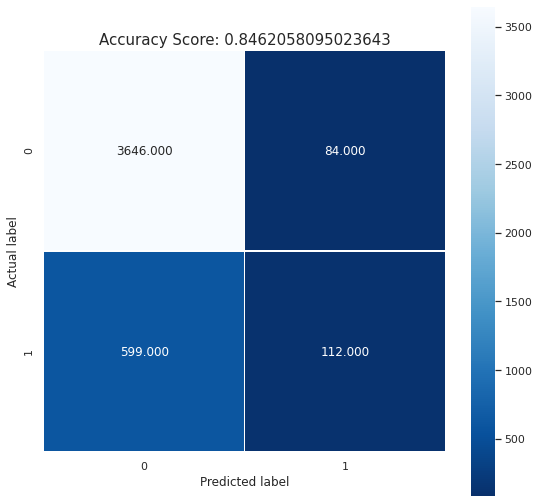

In [17]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

## ROC curve

Text(0.5, 1.0, 'ROC Curve, AUC = 0.770')

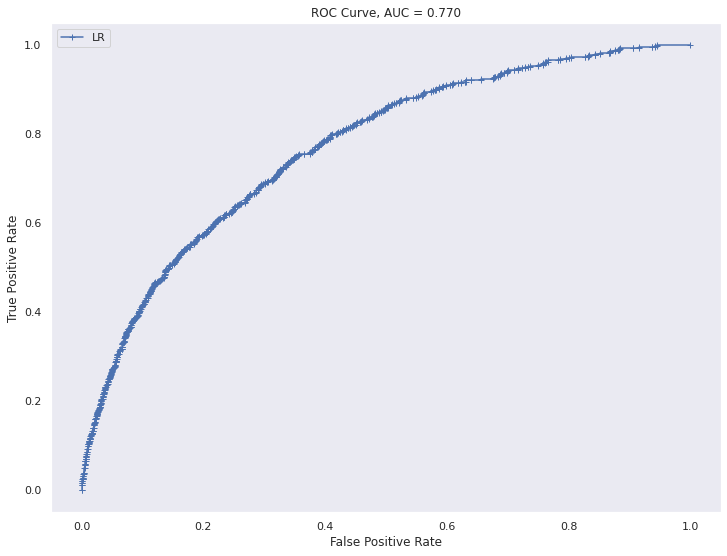

In [18]:
plt.figure(figsize=(12,9))
plt.plot(lr_fpr, lr_tpr, marker='+', label='LR')
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title(f'ROC Curve, AUC = {auc:.3f}')

## Precision-recall curve

Text(0.5, 1.0, 'Precision-Recall curve')

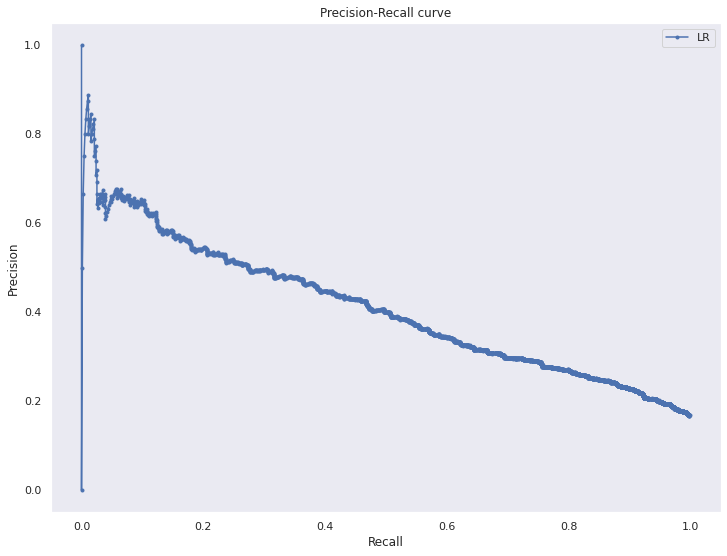

In [19]:
plt.figure(figsize=(12,9))
plt.plot(recall, precision, marker='.', label='LR')
plt.grid()
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title(f'Precision-Recall curve')

## Oversampling

In [20]:
x,y = oversample.fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,    #splitting 
                                                    test_size=0.25, 
                                                    random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Feature Scaling using sklearn

In [0]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Fit Logistic regression model to oversampled data

In [0]:
lrmodel1 = LogisticRegression()

# Start the model fitting process
lrmodel1.fit(x_train, y_train)

# Run inference on trained model
predictions1 = lrmodel1.predict(x_test)
lrprob1 = lrmodel1.predict_proba(x_test)

## Keeping positive outcomes (expired patients)

In [0]:
lrprob1 = lrprob1[:,1]

## Printing classification report

In [24]:
# Get model accuracy
acc = lrmodel1.score(x_test, y_test)
print(classification_report(y_test,predictions1))


              precision    recall  f1-score   support

           0       0.70      0.72      0.71      3706
           1       0.71      0.69      0.70      3693

    accuracy                           0.70      7399
   macro avg       0.70      0.70      0.70      7399
weighted avg       0.70      0.70      0.70      7399



In [0]:
p = metrics.precision_score(y_test,predictions1)
r = metrics.recall_score(y_test,predictions1)
f1 = metrics.f1_score(y_test, predictions1)

## ROC and AUC score

In [0]:
lr1_fpr, lr1_tpr, thresholds = metrics.roc_curve(y_test, lrprob1)
auc1 = metrics.roc_auc_score(y_test, lrprob1)

In [27]:
print('*'*30)
print(f'Logistic Regression results after oversampling: \n')
print(f'\t Acc = {acc:.3f} \n\t Precision={p:.3f} \n\t Recall={r:.3f} \n\t F1={f1:.3f} \n\t AUC={auc1:.3f} \n\t')

******************************
Logistic Regression results after oversampling: 

	 Acc = 0.705 
	 Precision=0.710 
	 Recall=0.691 
	 F1=0.700 
	 AUC=0.782 
	


In [0]:
precision1, recall1, _ = metrics.precision_recall_curve(y_test, lrprob1)

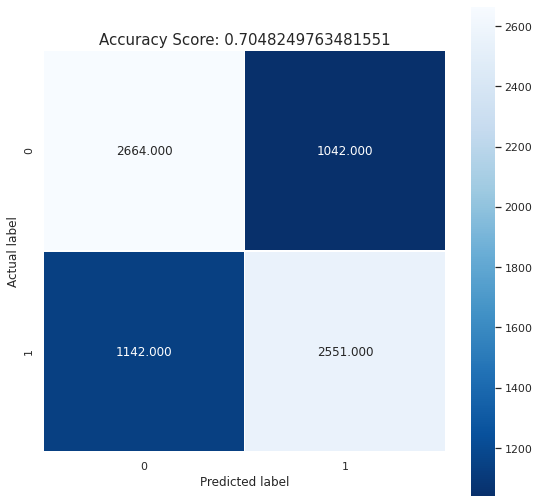

In [29]:
cm1 = metrics.confusion_matrix(y_test, predictions1)
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

Text(0.5, 1.0, 'ROC Curve, AUC = 0.782')

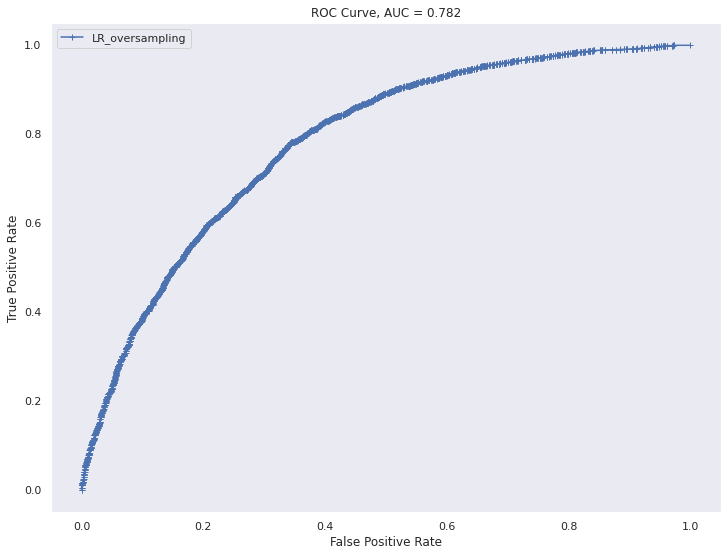

In [30]:
plt.figure(figsize=(12,9))
plt.plot(lr1_fpr, lr1_tpr, marker='+', label='LR_oversampling')
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title(f'ROC Curve, AUC = {auc1:.3f}')

Text(0.5, 1.0, 'Precision-Recall curve')

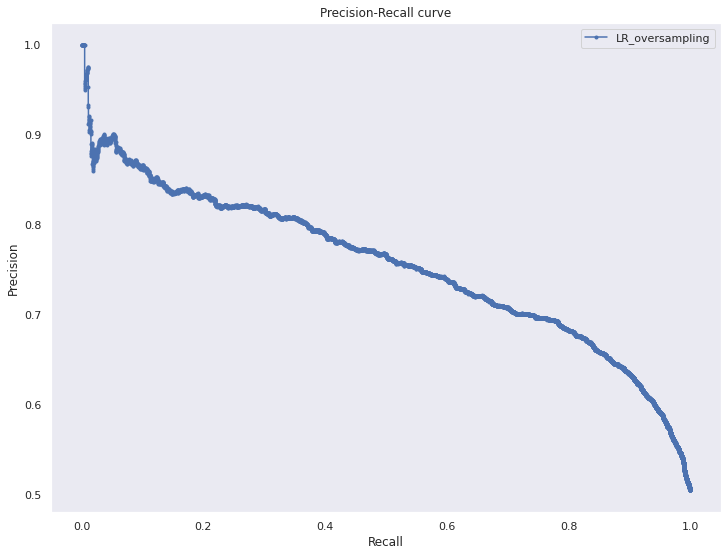

In [31]:
plt.figure(figsize=(12,9))
plt.plot(recall1, precision1, marker='.', label='LR_oversampling')
plt.grid()
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title(f'Precision-Recall curve')

## SVM

In [32]:
feature_cols = ['age','height','weight','eyes','motor','verbal','GCSTotal','temperature','respiratoryrate','heartrate','glucose','O2','fio2','ph','los','SBP','DBP','MAP','ethnicity','gender']
x = icudata[feature_cols]
y = icudata.hosp_alive
x,y = oversample.fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,    #splitting 
                                                    test_size=0.25, 
                                                    random_state=0)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Feature Scaling

In [0]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
modelsvm = SVC(kernel='linear',class_weight='balanced',probability=True)
modelsvm.fit(x_train,y_train)
predictionsvm = modelsvm.predict(x_test)
svmprob = modelsvm.predict_proba(x_test)

In [0]:
svmprob = svmprob[:,1]

In [36]:
acc_svm = modelsvm.score(x_test, y_test)
print(classification_report(y_test,predictionsvm))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      3706
           1       0.71      0.72      0.71      3693

    accuracy                           0.71      7399
   macro avg       0.71      0.71      0.71      7399
weighted avg       0.71      0.71      0.71      7399



In [0]:
p = metrics.precision_score(y_test, predictionsvm)
r = metrics.recall_score(y_test, predictionsvm)
f1 = metrics.f1_score(y_test, predictionsvm)


In [0]:
svm_fpr, svm_tpr, thresholds = metrics.roc_curve(y_test, svmprob)
auc_svm = metrics.roc_auc_score(y_test, svmprob)

In [0]:
precision2, recall2, _ = metrics.precision_recall_curve(y_test, svmprob)

In [40]:
print('*'*30)
print(f'Support Vector Machine results: \n')
print(f'\t Acc = {acc_svm:.3f} \n\t Precision={p:.3f} \n\t Recall={r:.3f} \n\t F1={f1:.3f} \n\t AUC={auc_svm:.3f} \n\t')

******************************
Support Vector Machine results: 

	 Acc = 0.709 
	 Precision=0.706 
	 Recall=0.716 
	 F1=0.711 
	 AUC=0.777 
	


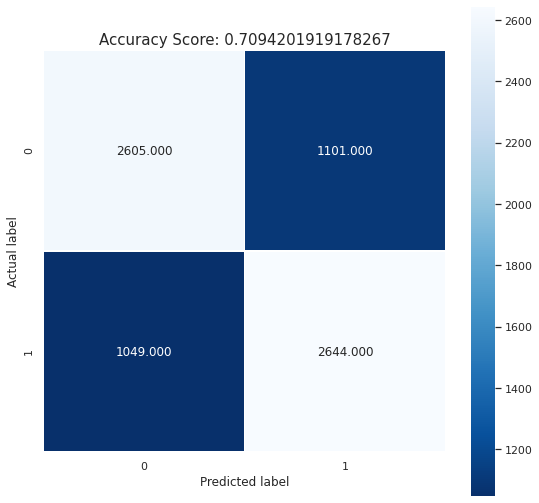

In [41]:
cm2 = metrics.confusion_matrix(y_test, predictionsvm)
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_svm)
plt.title(all_sample_title, size = 15);

Text(0.5, 1.0, 'ROC Curve, AUC = 0.777')

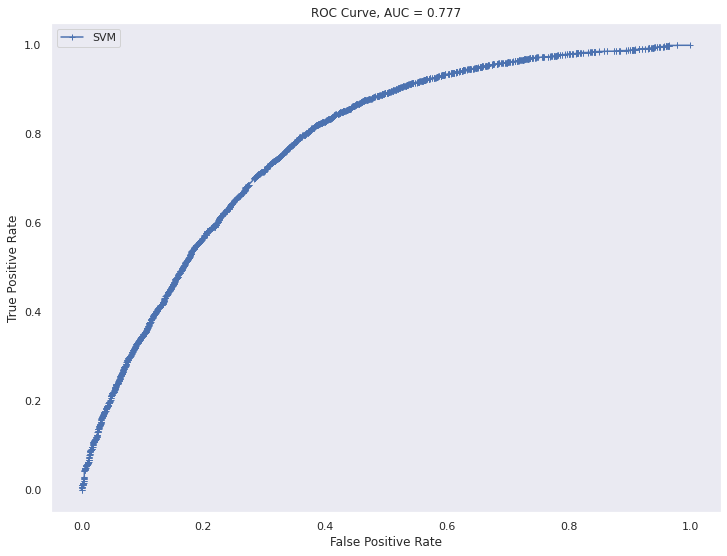

In [42]:
plt.figure(figsize=(12,9))
plt.plot(svm_fpr, svm_tpr, marker='+', label='SVM')
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title(f'ROC Curve, AUC = {auc_svm:.3f}')

Text(0.5, 1.0, 'Precision-Recall curve')

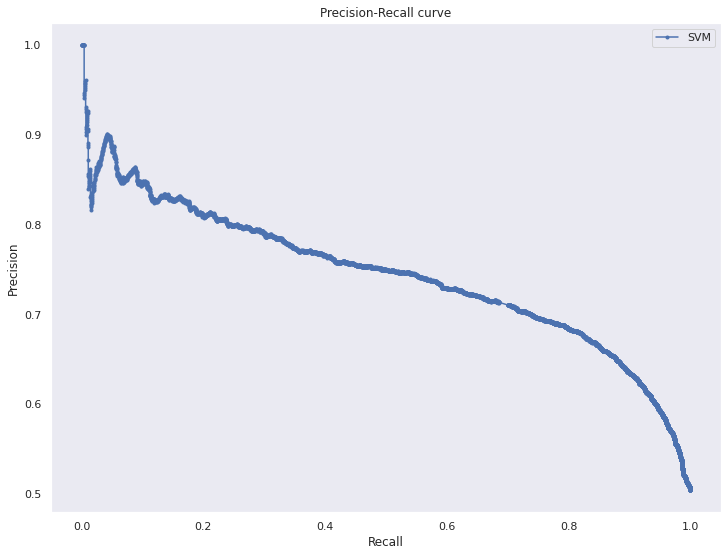

In [43]:
plt.figure(figsize=(12,9))
plt.plot(recall2, precision2, marker='.', label='SVM')
plt.grid()
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title(f'Precision-Recall curve')

## Random Forest

In [44]:
feature_cols = ['age','height','weight','eyes','motor','verbal','GCSTotal','temperature','respiratoryrate','heartrate','glucose','O2','fio2','ph','los','SBP','DBP','MAP','ethnicity','gender']
x = icudata.drop('hosp_alive',axis=1)
y = icudata.hosp_alive
x,y = oversample.fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,    #splitting 
                                                    test_size=0.25, 
                                                    random_state=0)
#x_train, y_train = oversample.fit_resample(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Feature Scaling

In [0]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Deploying Model

In [46]:
rfmodel = RandomForestClassifier(n_estimators=100,class_weight='balanced')
rfmodel.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predictions_rf = rfmodel.predict(x_test)
rf_prob = rfmodel.predict_proba(x_test)

## Keeping positive outcome (expired patients)

In [0]:
rf_prob = rf_prob[:,1]

## Printing Classification Report

In [49]:
rf_acc = rfmodel.score(x_test, y_test)
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3706
           1       0.94      0.89      0.91      3693

    accuracy                           0.92      7399
   macro avg       0.92      0.92      0.92      7399
weighted avg       0.92      0.92      0.92      7399



In [0]:
p = metrics.precision_score(y_test, predictions_rf)
r = metrics.recall_score(y_test, predictions_rf)
f1 = metrics.f1_score(y_test, predictions_rf)

## ROC and AUC score

In [0]:
rf_fpr, rf_tpr, thresholds = metrics.roc_curve(y_test, rf_prob)
rf_auc = metrics.roc_auc_score(y_test, rf_prob)

In [52]:
print('*'*30)
print(f'Random Forest results: \n')
print(f'\t Acc = {rf_acc:.3f} \n\t Precision={p:.3f} \n\t Recall={r:.3f} \n\t F1={f1:.3f} \n\t AUC={rf_auc:.3f} \n\t')

******************************
Random Forest results: 

	 Acc = 0.915 
	 Precision=0.937 
	 Recall=0.890 
	 F1=0.913 
	 AUC=0.971 
	


In [0]:
precision3, recall3, _ = metrics.precision_recall_curve(y_test, rf_prob)

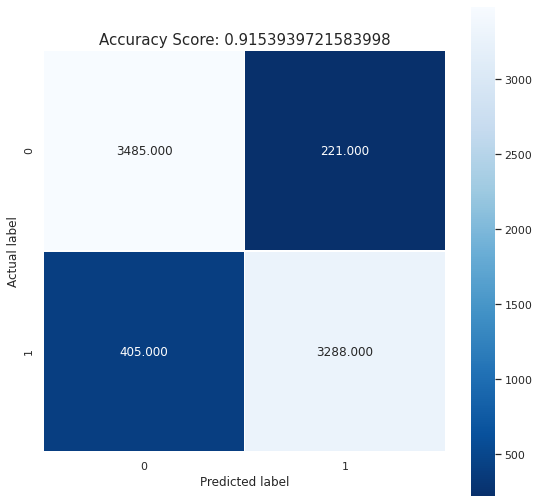

In [54]:
cm3 = metrics.confusion_matrix(y_test, predictions_rf)
plt.figure(figsize=(9,9))
sns.heatmap(cm3, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(rf_acc)
plt.title(all_sample_title, size = 15);

Text(0.5, 1.0, 'ROC Curve, AUC = 0.971')

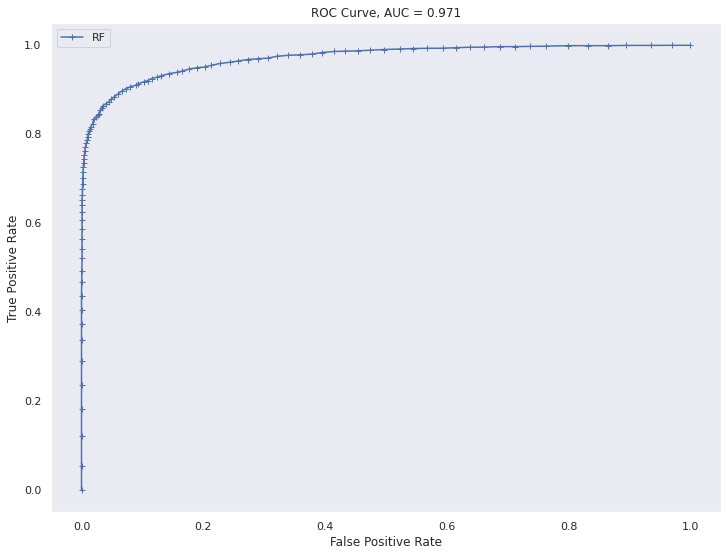

In [55]:
plt.figure(figsize=(12,9))
plt.plot(rf_fpr, rf_tpr, marker='+', label='RF')
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title(f'ROC Curve, AUC = {rf_auc:.3f}')

Text(0.5, 1.0, 'Precision-Recall curve')

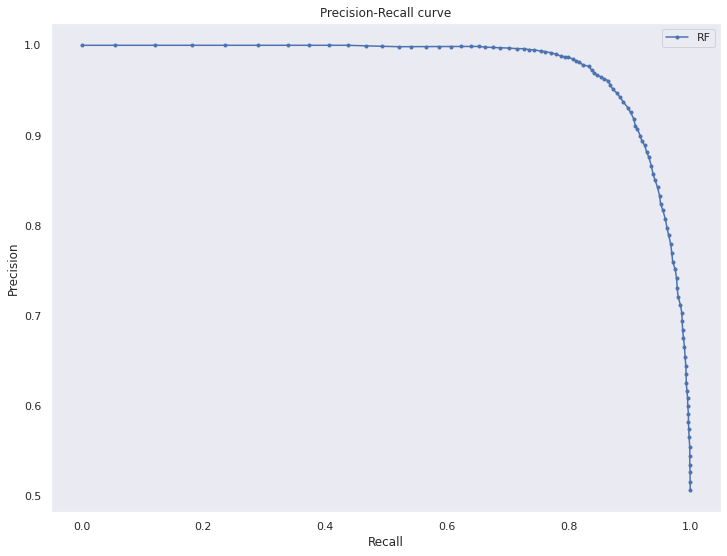

In [56]:
plt.figure(figsize=(12,9))
plt.plot(recall3, precision3, marker='.', label='RF')
plt.grid()
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title(f'Precision-Recall curve')

## Feature Selection in Random Forest

In [57]:
feature_imp = pd.DataFrame(rfmodel.feature_importances_,index=feature_cols,columns=['importance']).sort_values('importance',ascending=False)
feature_imp

,importance
motor,0.110331
O2,0.084889
GCSTotal,0.083917
eyes,0.074854
verbal,0.065047
los,0.052693
MAP,0.051502
heartrate,0.047484
SBP,0.046289
temperature,0.041831


## Visualizing important features

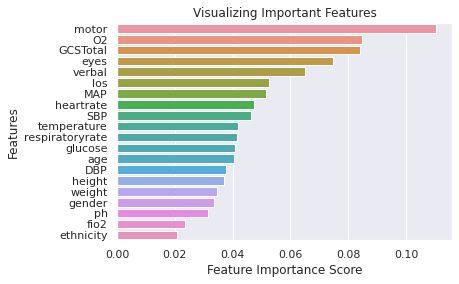

In [58]:
sns.barplot(x=feature_imp.importance,y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

## Fitting Random forest model to selected features

In [59]:
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(rfmodel)
fit = feature.fit_transform(x_train,y_train)
print(f'Number of features selected are :  {fit.shape[1]}')

Number of features selected are :  7


In [60]:
for feature_list_index in feature.get_support(indices=True):
    print(f'Features selected are : {feature_imp.index[feature_list_index]}')

Features selected are : eyes
Features selected are : verbal
Features selected are : los
Features selected are : MAP
Features selected are : glucose
Features selected are : height
Features selected are : ph


In [0]:
x_imp_train = feature.transform(x_train)
x_imp_test = feature.transform(x_test)

In [62]:
rf_imp = RandomForestClassifier(n_estimators=100,class_weight='balanced')
rf_imp.fit(x_imp_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
pred_imp = rf_imp.predict(x_imp_test)
rfimp_proba = rf_imp.predict_proba(x_imp_test)

## Keeping positive outcome (probability of expired patients)

In [0]:
rfimp_proba=rfimp_proba[:,1]

## Printing classification report

In [65]:
acc_imp = rf_imp.score(x_imp_test,y_test)
print(classification_report(y_test,pred_imp))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3706
           1       0.88      0.81      0.84      3693

    accuracy                           0.85      7399
   macro avg       0.85      0.85      0.85      7399
weighted avg       0.85      0.85      0.85      7399



In [0]:
p = metrics.precision_score(y_test, pred_imp)
r = metrics.recall_score(y_test, pred_imp)
f1 = metrics.f1_score(y_test, pred_imp)

## ROC and AUC curve

In [0]:
rf1_fpr, rf1_tpr, thresholds = metrics.roc_curve(y_test,rfimp_proba)
rf1auc= metrics.roc_auc_score(y_test,rfimp_proba)

In [68]:
print('*'*30)
print(f'Random Forest after Feature selection: \n')
print(f'\t Acc = {acc_imp:.3f} \n\t Precision={p:.3f} \n\t Recall={r:.3f} \n\t F1={f1:.3f} \n\t AUC={rf1auc:.3f} \n\t')

******************************
Random Forest after Feature selection: 

	 Acc = 0.850 
	 Precision=0.877 
	 Recall=0.814 
	 F1=0.845 
	 AUC=0.928 
	


In [0]:
precision4, recall4, _ = metrics.precision_recall_curve(y_test, rfimp_proba)

## Confusion Matrix

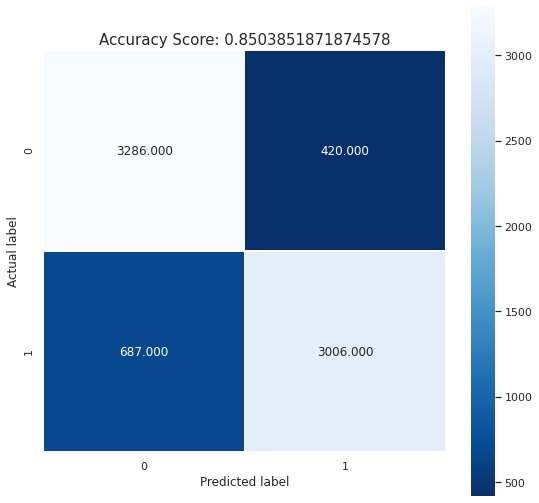

In [70]:
cm4 = metrics.confusion_matrix(y_test, pred_imp)
plt.figure(figsize=(9,9))
sns.heatmap(cm4, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_imp)
plt.title(all_sample_title, size = 15);

## ROC curve

Text(0.5, 1.0, 'ROC Curve, AUC = 0.928')

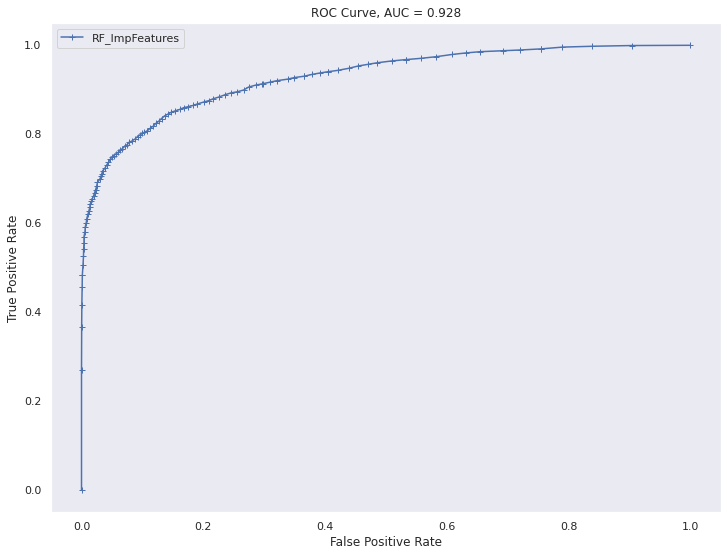

In [71]:
plt.figure(figsize=(12,9))
plt.plot(rf1_fpr, rf1_tpr, marker='+', label='RF_ImpFeatures')
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title(f'ROC Curve, AUC = {rf1auc:.3f}')

## Precision Recall Curve

Text(0.5, 1.0, 'Precision-Recall curve')

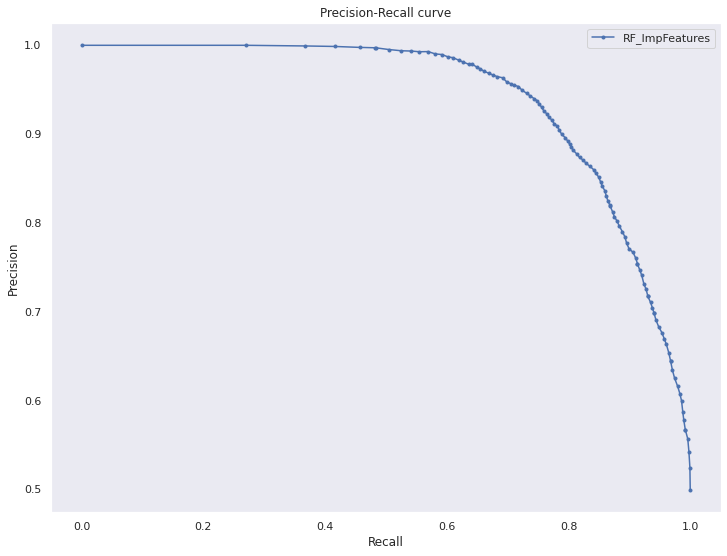

In [72]:
plt.figure(figsize=(12,9))
plt.plot(recall4, precision4, marker='.', label='RF_ImpFeatures')
plt.grid()
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title(f'Precision-Recall curve')

## Principal Component Analysis

In [73]:
x = icudata.drop('hosp_alive',axis=1)
y = icudata.hosp_alive
x,y = oversample.fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,    #splitting 
                                                    test_size=0.25, 
                                                    random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Feature Scaling

In [0]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## PCA using 95th variance

In [0]:
from sklearn.decomposition import PCA
pca = PCA(.95)

In [76]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

## Applying Logistic Regression to PCA features

In [78]:
pca_lr = LogisticRegression()
pca_lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pca_pred = pca_lr.predict(x_test)
pca_prob = pca_lr.predict_proba(x_test)

In [0]:
pca_prob = pca_prob[:,1]

## Printing classification report

In [81]:
acc_pca = pca_lr.score(x_test,y_test)
print(classification_report(y_test,pca_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      3706
           1       0.71      0.70      0.70      3693

    accuracy                           0.71      7399
   macro avg       0.71      0.71      0.71      7399
weighted avg       0.71      0.71      0.71      7399



In [0]:
p = metrics.precision_score(y_test, pca_pred)
r = metrics.recall_score(y_test, pca_pred)
f1 = metrics.f1_score(y_test, pca_pred)

## ROC and AUC score

In [0]:
pca_fpr, pca_tpr, thresholds = metrics.roc_curve(y_test,pca_prob)
pca_auc= metrics.roc_auc_score(y_test,pca_prob)

In [84]:
print('*'*30)
print(f'Logistic Regression after PCA results: \n')
print(f'\t Acc = {acc_pca:.3f} \n\t Precision={p:.3f} \n\t Recall={r:.3f} \n\t F1={f1:.3f} \n\t AUC={pca_auc:.3f} \n\t')

******************************
Logistic Regression after PCA results: 

	 Acc = 0.707 
	 Precision=0.711 
	 Recall=0.697 
	 F1=0.704 
	 AUC=0.778 
	


In [0]:
precision5, recall5, _ = metrics.precision_recall_curve(y_test, pca_prob)

## Confusion Matrix

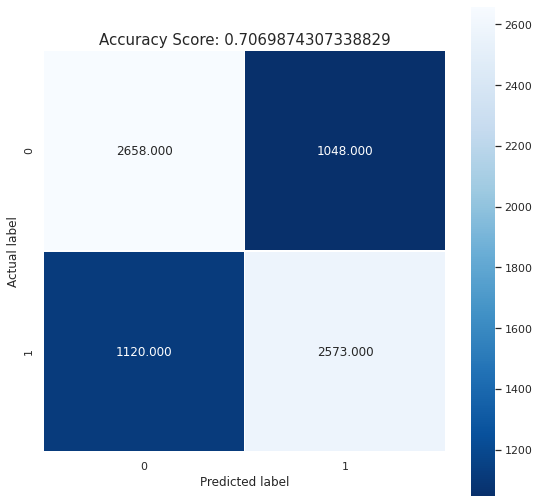

In [86]:
cm5 = metrics.confusion_matrix(y_test, pca_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm5, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_pca)
plt.title(all_sample_title, size = 15);

## ROC Curve

Text(0.5, 1.0, 'ROC Curve, AUC = 0.778')

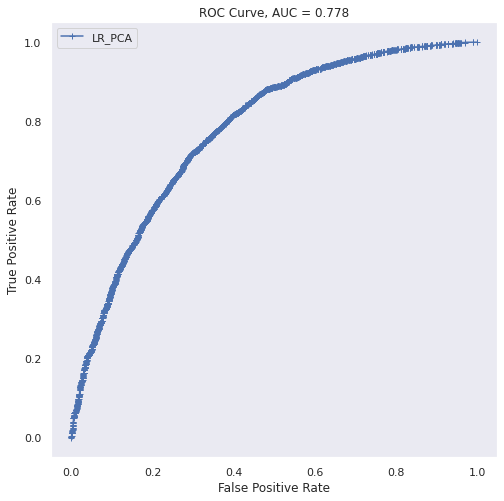

In [87]:
plt.figure(figsize=(8,8))
plt.plot(pca_fpr, pca_tpr, marker='+', label='LR_PCA')
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title(f'ROC Curve, AUC = {pca_auc:.3f}')

## Precision Recall curve

Text(0.5, 1.0, 'Precision-Recall curve')

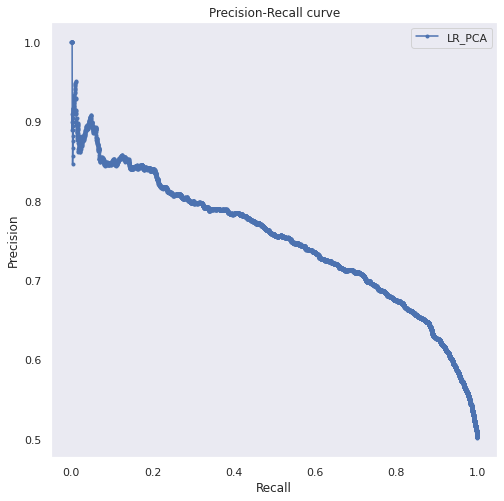

In [88]:
plt.figure(figsize=(8,8))
plt.plot(recall5, precision5, marker='.', label='LR_PCA')
plt.grid()
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title(f'Precision-Recall curve')

# Visual comparison of all the models

## Confusion Matrix Comparison

Text(1428.3285714285712, 0.5, 'Actual label')

<Figure size 2000x2000 with 0 Axes>

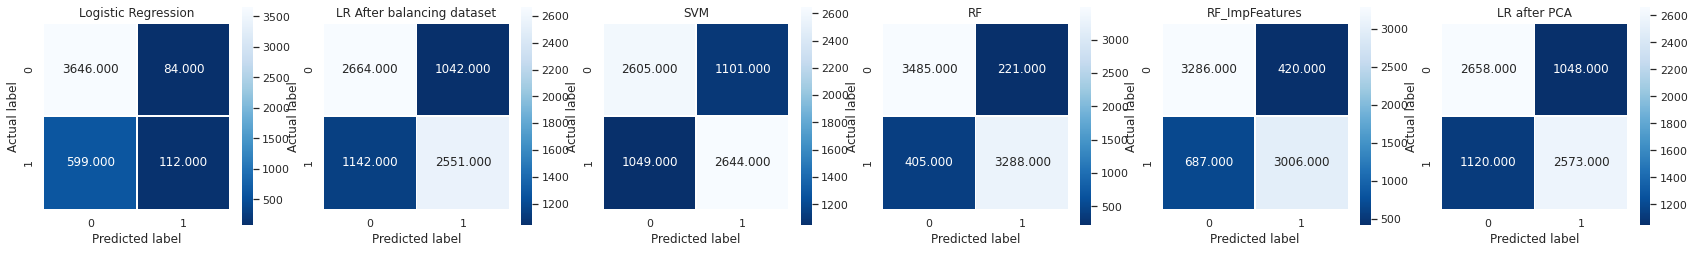

In [89]:
plt.figure(figsize=(20,20),dpi=100)
fig, (ax,ax2,ax3,ax4,ax5,ax6) = plt.subplots(ncols=6)
fig.subplots_adjust(right=3.9)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r',ax=ax);
ax.set_title('Logistic Regression')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r',ax=ax2);
ax2.set_title('LR After balancing dataset')
ax2.set_xlabel('Predicted label')
ax2.set_ylabel('Actual label')
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r',ax=ax3);
ax3.set_title('SVM')
ax3.set_xlabel('Predicted label')
ax3.set_ylabel('Actual label')
sns.heatmap(cm3, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r',ax=ax4);
ax4.set_title('RF')
ax4.set_xlabel('Predicted label')
ax4.set_ylabel('Actual label')
sns.heatmap(cm4, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r',ax=ax5);
ax5.set_title('RF_ImpFeatures')
ax5.set_xlabel('Predicted label')
ax5.set_ylabel('Actual label')
sns.heatmap(cm5, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r',ax=ax6);
ax6.set_title('LR after PCA')
ax6.set_xlabel('Predicted label')
ax6.set_ylabel('Actual label')

## ROC Comparison

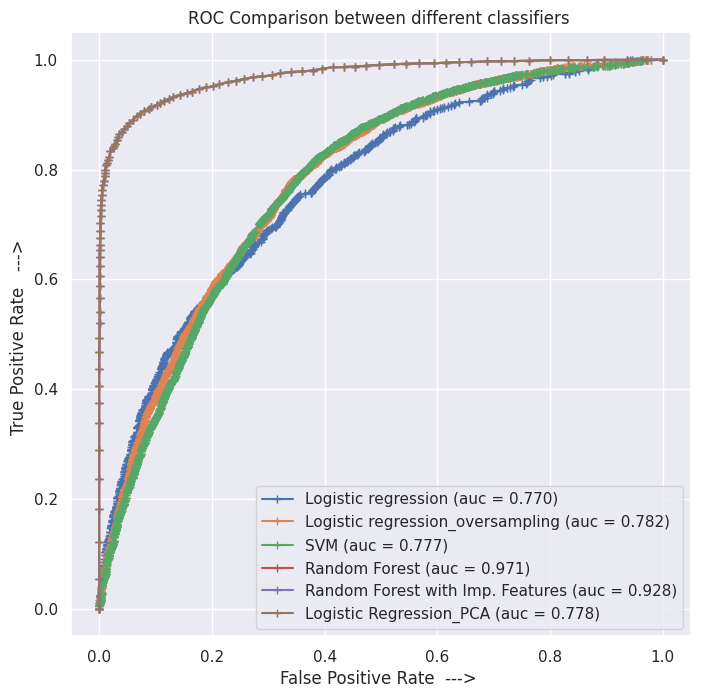

In [90]:
plt.figure(figsize=(8,8),dpi=100)
plt.plot(lr_fpr, lr_tpr, marker='+', label='Logistic regression (auc = %0.3f)' % auc)
plt.plot(lr1_fpr, lr1_tpr, marker='+', label='Logistic regression_oversampling (auc = %0.3f)' % auc1)
plt.plot(svm_fpr, svm_tpr, marker='+', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(rf_fpr, rf_tpr, marker='+', label='Random Forest (auc = %0.3f)' % rf_auc)
plt.plot(rf_fpr, rf_tpr, marker='+', label='Random Forest with Imp. Features (auc = %0.3f)' % rf1auc)
plt.plot(rf_fpr, rf_tpr, marker='+', label='Logistic Regression_PCA (auc = %0.3f)' % pca_auc)

plt.xlabel('False Positive Rate  ---> ')
plt.ylabel('True Positive Rate   ---> ')
plt.legend()
plt.title('ROC Comparison between different classifiers ')
plt.show()

## Precision-Recall curve comparison

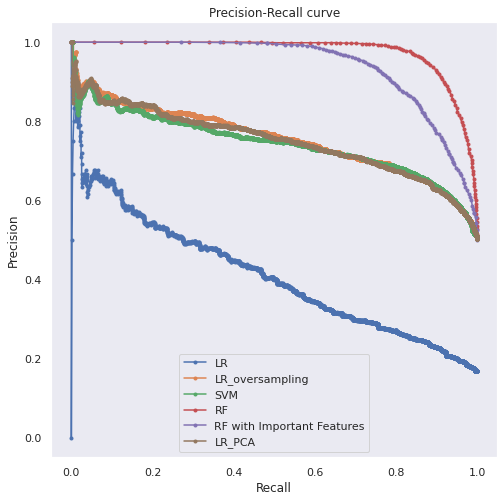

In [91]:
plt.figure(figsize=(8,8))
plt.plot(recall, precision, marker='.', label='LR')
plt.plot(recall1, precision1, marker='.', label='LR_oversampling')
plt.plot(recall2, precision2, marker='.', label='SVM')
plt.plot(recall3, precision3, marker='.', label='RF')
plt.plot(recall4, precision4, marker='.', label='RF with Important Features')
plt.plot(recall5, precision5, marker='.', label='LR_PCA')

plt.grid()
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title(f'Precision-Recall curve')
plt.show()

## Model Comparison 
### 5-fold cross validation technique

In [0]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Loading and scaling dataset

In [93]:
feature_cols = ['age','height','weight','eyes','motor','verbal','GCSTotal','temperature','respiratoryrate','heartrate','glucose','O2','fio2','ph','los','SBP','DBP','MAP','ethnicity','gender']
x = icudata[feature_cols]
y = icudata.hosp_alive
x,y = oversample.fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,    #splitting 
                                                    test_size=0.25, 
                                                    random_state=0)
#x_train, y_train = oversample.fit_resample(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Cross validation with scoring for AUC

In [0]:
#cv_r2_scores_rf = cross_val_score(rf_imp, x, y, cv=5,scoring='roc_auc')
#print(cv_r2_scores_rf)
#mean = np.mean(cv_r2_scores_rf)
#sd = np.std(cv_r2_scores_rf)
#print(f'Mean is {mean} and sd is {sd}')

In [0]:
# prepare models
models = []
models.append(('LR', lrmodel))
models.append(('LR after SMOTE', lrmodel1))
models.append(('SVM', modelsvm))
models.append(('RF', rfmodel))
models.append(('RF with Imp Features', rf_imp))
models.append(('LR with PCA', pca_lr))
# evaluate each model in turn
results = []
names = []
msg=[]

for name, model in models:
	#kfold = model_selection.KFold(n_splits=5, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x,y, cv=5, scoring='roc_auc')
	results.append(cv_results)
	names.append(name)
	msg = [name, cv_results.mean(), cv_results.std()]
print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## Cross Validation for accuracy

In [0]:
# prepare models
models = []
models.append(('LR', lrmodel))
models.append(('LR after SMOTE', lrmodel1))
models.append(('SVM', modelsvm))
models.append(('RF', rfmodel))
models.append(('RF with Imp Features', rf_imp))
models.append(('LR with PCA', pca_lr))
# evaluate each model in turn
results = []
names = []
msg=[]

for name, model in models:
	#kfold = model_selection.KFold(n_splits=5, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x,y, cv=5, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = [name, cv_results.mean(), cv_results.std()]

print(msg)

## Cross Validation for Specificity

In [0]:
# prepare models
models = []
models.append(('LR', lrmodel))
models.append(('LR after SMOTE', lrmodel1))
models.append(('SVM', modelsvm))
models.append(('RF', rfmodel))
models.append(('RF with Imp Features', rf_imp))
models.append(('LR with PCA', pca_lr))
# evaluate each model in turn
results = []
names = []
msg = []
for name, model in models:
	#kfold = model_selection.KFold(n_splits=5, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x,y, cv=5, scoring='precision')
	results.append(cv_results)
	names.append(name)
	msg = [name, cv_results.mean(), cv_results.std()]

print(msg)

## Cross Validation using Recall

In [0]:
# prepare models
models = []
models.append(('LR', lrmodel))
models.append(('LR after SMOTE', lrmodel1))
models.append(('SVM', modelsvm))
models.append(('RF', rfmodel))
models.append(('RF with Imp Features', rf_imp))
models.append(('LR with PCA', pca_lr))
# evaluate each model in turn
results = []
names = []
msg=[]

for name, model in models:
	#kfold = model_selection.KFold(n_splits=5, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x,y, cv=5, scoring='recall')
	results.append(cv_results)
	names.append(name)
	msg = [name, cv_results.mean(), cv_results.std()]

print(msg)